# H10.2: Regression with the $v$-SVR

## a)

In [7]:
from sklearn import svm
from sklearn.model_selection import KFold
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# data preparation
TrainingData = np.genfromtxt('TrainingRidge.csv', delimiter=',', skip_header=1)
ValidationData = np.genfromtxt('ValidationRidge.csv', delimiter=',', skip_header=1)

def get_MSE(trueLabel, pred):
    n = trueLabel.shape[0]
    return np.sum((pred-trueLabel)**2)/(n*1.0)

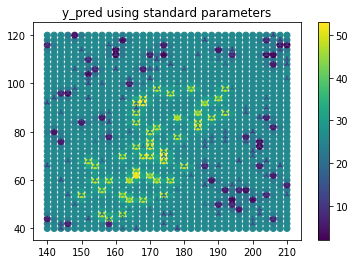

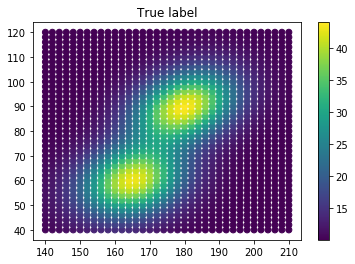

MSE on Validation set: 76.791278


In [9]:
svm_with_standard_params = svm.NuSVR()
svm_with_standard_params.fit(TrainingData[:, 0:2], TrainingData[:, 2])
y_pred = svm_with_standard_params.predict(ValidationData[:, 0:2])

plt.scatter(ValidationData[:,0], ValidationData[:,1], c=y_pred)
plt.scatter(TrainingData[:, 0], TrainingData[:, 1], c=TrainingData[:, 2], marker='2')
plt.colorbar()
plt.title('y_pred using standard parameters')
plt.show()

plt.scatter(ValidationData[:, 0], ValidationData[:, 1], c=ValidationData[:, 2])
plt.colorbar()
plt.title('True label')
plt.show()

print "MSE on Validation set: %f" % get_MSE(ValidationData[:, 2], y_pred)

## b)

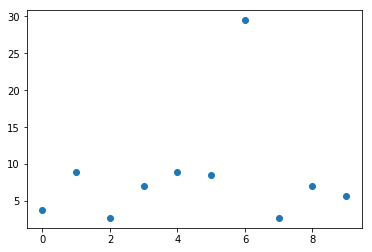

Optimal param: C=16.000000, gamma=0.003906. min MSE=2.723902


In [13]:
folds = 10
kf = KFold(n_splits=folds)
q = 2
n_C = 15
n_gamma = 13
C_options = np.empty((n_C, ))
C_options[0] = 2**-2
C_options[1:] = q
C_options = np.cumprod(C_options)

gamma_options = np.empty((n_gamma, ))
gamma_options[0] = 2**-12
gamma_options[1:] = q
gamma_options = np.cumprod(gamma_options)

MSEs = []
min_MSE_global = 1e9
best_C_global = C_options[0]
best_gamma_global = gamma_options[0]

for train_index, test_index in kf.split(TrainingData):
    min_MSE_cur_fold = 1e9
    best_C_cur_fold = C_options[0]
    best_gamma_cur_fold = gamma_options[0]
    for c in C_options:
        for gamma in gamma_options:
            svm_param = svm.NuSVR(kernel='rbf', C=c, gamma=gamma,nu=0.5)
            svm_param.fit(TrainingData[train_index][:, 0:2], TrainingData[train_index][:, 2])
            pred = svm_param.predict(TrainingData[test_index][:, 0:2])
            cur_MSE = get_MSE(pred, TrainingData[test_index][:, 2])
            if cur_MSE < min_MSE_cur_fold:
                min_MSE_cur_fold = cur_MSE
                best_C_cur_fold = c
                best_gamma_cur_fold = gamma
    svm_with_optimal_param_cur_fold = svm.NuSVR(kernel='rbf', C=best_C_cur_fold, gamma=best_gamma_cur_fold, nu=0.5)
    svm_with_optimal_param_cur_fold.fit(TrainingData[:, 0:2], TrainingData[:, 2])
    pred_cur_fold = svm_with_optimal_param_cur_fold.predict(ValidationData[:, 0:2])
    MSE_cur_fold = get_MSE(ValidationData[:, 2], pred_cur_fold)
    MSEs += [MSE_cur_fold]
    if(MSE_cur_fold < min_MSE_global):
        min_MSE_global = MSE_cur_fold
        best_C_global = best_C_cur_fold
        best_gamma_global = best_gamma_cur_fold
        
plt.scatter(np.arange(0, 10), MSEs)
plt.show()
print "Optimal param: C=%f, gamma=%f. min MSE=%f" % (best_C_global, best_gamma_global, min_MSE_global)

## c)

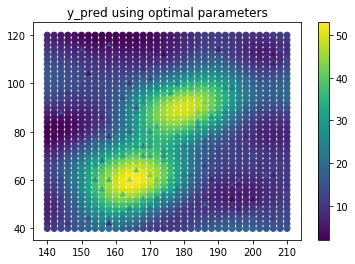

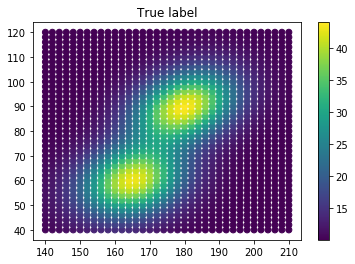

MSE on Validation set: 4.911200


In [14]:
svm_with_optimal_params = svm.SVR(kernel='rbf', C=best_C_global, gamma=best_gamma_global, epsilon=0.5)
svm_with_optimal_params.fit(TrainingData[:, 0:2], TrainingData[:,2])
y_pred = svm_with_optimal_params.predict(ValidationData[:, 0:2])

plt.scatter(ValidationData[:,0], ValidationData[:,1], c=y_pred)
plt.scatter(TrainingData[:, 0], TrainingData[:, 1], c=TrainingData[:, 2], marker='2')
plt.colorbar()
plt.title('y_pred using optimal parameters')
plt.show()

plt.scatter(ValidationData[:, 0], ValidationData[:, 1], c=ValidationData[:, 2])
plt.colorbar()
plt.title('True label')
plt.show()

print "MSE on Validation set: %f" % get_MSE(ValidationData[:, 2], y_pred)

Compared with the plot using standard parameters, using optimal parameters leads to an obviously better generalization. Also the mean squared error decreased rapidly (from 76.79 to 4.91).